In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# STO : Stochastic Oscillator 
# the Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods.

# hyperparameter
period = 20
sma_num = 10

# calculate %K
def STOK(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    return STOK 

# calculate %D
def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    STOD = STOK.rolling(sma_num).mean()
    return STOD

In [5]:
df = pd.read_csv('../data/DJI_fe.csv')
df['%K'] = STOK(df['Close'], df['Low'], df['High'], period)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], period)

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


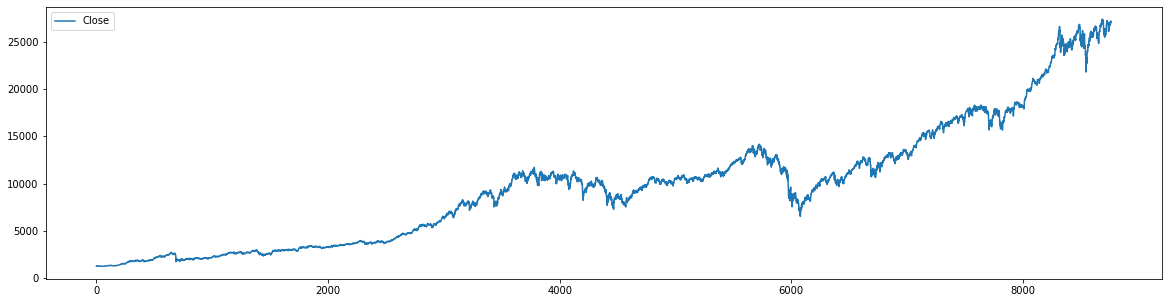

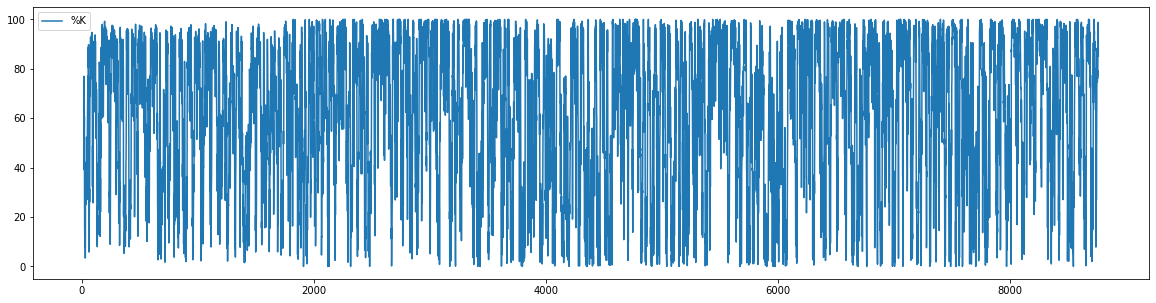

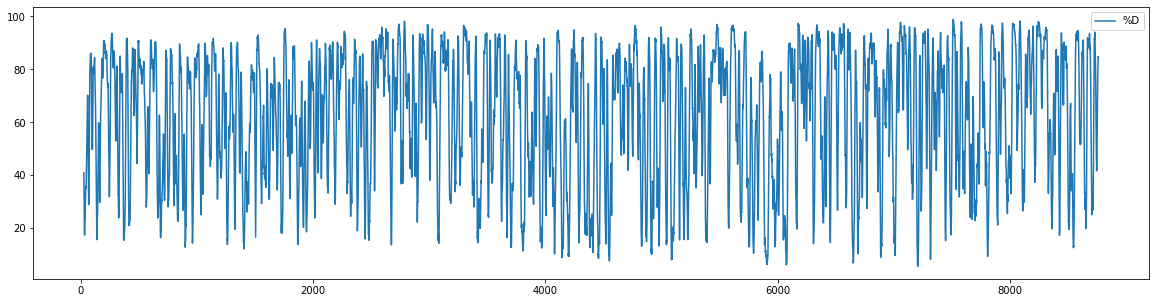

In [6]:
df.plot(y=['Close'], figsize = (20, 5))
df.plot(y=['%K'], figsize = (20, 5))
df.plot(y=['%D'], figsize = (20, 5))

In [8]:
df.to_csv('../data/DJI_fe.csv')